# SUPPLEMENTAL VISUALIZATIONS

# ===========

## This notebook contains additional analyses based for clarifying findings from previous exploration.

# ===========

## Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path

path = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project'

In [3]:
# Import data

df_cat = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_cleaned_v2.csv'))

In [4]:
df_cat.head()

,Unnamed: 0,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
1,1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
2,2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
3,3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
4,4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,0.0,0.0


In [5]:
df_cat.shape

(12230, 14)

In [6]:
# remove unwanted column

df_cat = df_cat.drop(columns = ['Unnamed: 0'])

In [7]:
df_cat.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,0.0,0.0
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,0.0,0.0


In [8]:
df_cat.dtypes

name                               object
year                                int64
month                               int64
day                                 int64
hour                                int64
latitude                          float64
longitude                         float64
status                             object
category                            int64
wind_knots                          int64
pressure_hpa                        int64
trop_storm_force_wind_diameter    float64
hurricane_force_wind_diameter     float64
dtype: object

## Create categorical plot for combined force wind diameter

In [9]:
# Create new summed column for force wind diameters

sum = df_cat['trop_storm_force_wind_diameter'] + df_cat['hurricane_force_wind_diameter']

In [10]:
# Assign column

df_cat['combined_force_wind_diameter'] = df_cat['trop_storm_force_wind_diameter'] + df_cat['hurricane_force_wind_diameter']

In [11]:
df_cat.head()

,name,year,month,day,hour,latitude,longitude,status,category,wind_knots,pressure_hpa,trop_storm_force_wind_diameter,hurricane_force_wind_diameter,combined_force_wind_diameter
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,-1,25,1013,0.0,0.0,0.0
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,-1,25,1013,0.0,0.0,0.0
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,-1,25,1013,0.0,0.0,0.0
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,-1,25,1013,0.0,0.0,0.0
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,-1,25,1012,0.0,0.0,0.0


<AxesSubplot:xlabel='combined_force_wind_diameter', ylabel='Count'>

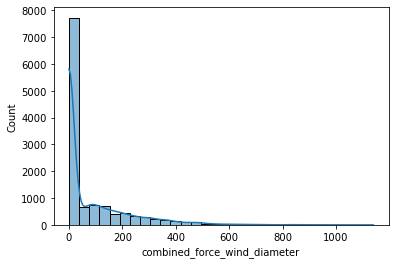

In [12]:
# Create histogram to see force wind distribution

sns.histplot(df_cat['combined_force_wind_diameter'], bins = 30, kde=True)

##### Such a high prevalence of zeros is skewing the distribution. These will be omitted in categorical plot to only look at storms with known combined force wind diameter size.

In [13]:
# Create categories based on distribution

df_cat.loc[df_cat['combined_force_wind_diameter'] < 1, 'Storm size'] = 'No storm'

In [14]:
df_cat.loc[(df_cat['combined_force_wind_diameter'] >= 1) & (df_cat['combined_force_wind_diameter'] < 200), 'Storm size'] = 'Small'

In [15]:
df_cat.loc[(df_cat['combined_force_wind_diameter'] >= 200) & (df_cat['combined_force_wind_diameter'] < 400), 'Storm size'] = 'Medium'

In [16]:
df_cat.loc[df_cat['combined_force_wind_diameter'] >= 400, 'Storm size'] = 'Large'

In [17]:
# Check categories

df_cat['Storm size'].value_counts(dropna=False)

No storm    7615
Small       2744
Medium      1437
Large        434
Name: Storm size, dtype: int64

In [18]:
# Drop 'No storm' observations

df_cat.drop(df_cat[df_cat['Storm size'] == 'No storm'].index, inplace=True)

In [19]:
df_cat['Storm size'].value_counts(dropna=False)

Small     2744
Medium    1437
Large      434
Name: Storm size, dtype: int64

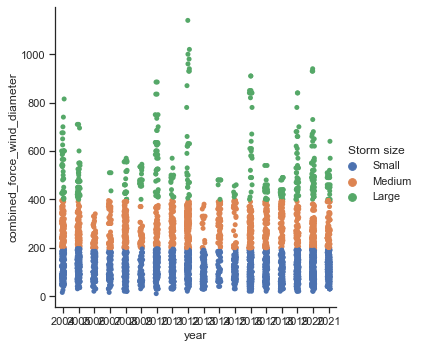

In [20]:
# Create a categorical plot in seaborn

sns.set(style='ticks')
g = sns.catplot(x='year', y='combined_force_wind_diameter', hue='Storm size', data=df_cat)


In [23]:
# Export for safety

df_cat.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'storms_combined_diameter.csv'))

## Create updated choropleth map for landfall frequency

In [22]:
# Import data

df_land = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'averages_year_name.xlsx'))

In [23]:
df_land.head()

,year,name,state,avg_wind_knots,avg_storm_force_wind_diameter
0,1976,Belle,Pennsylvania,60.000000,0.0
1,1976,Belle,South Carolina,35.000000,0.0
2,1977,Clara,South Carolina,20.000000,0.0
3,1978,Amelia,South Carolina,27.500000,0.0
4,1979,Bob,Alabama,26.111111,0.0


In [24]:
df_land.shape

(190, 5)

In [25]:
df_land.dtypes

year                               int64
name                              object
state                             object
avg_wind_knots                   float64
avg_storm_force_wind_diameter    float64
dtype: object

In [26]:
data_to_plot = df_land[['state', 'year']]
data_to_plot.head()

,state,year
0,Pennsylvania,1976
1,South Carolina,1976
2,South Carolina,1977
3,South Carolina,1978
4,Alabama,1979


In [27]:
# import additional libraries

import folium
import json

In [28]:
# import JSON file

us_geo = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 6/Storms Project/02 Data/Original Data/us-states.json'

In [29]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = us_geo, 
    data = data_to_plot,
    columns = [ 'state', 'year'],
    key_on = 'feature.properties.name', 
    legend_name = 'year').add_to(map)
folium.LayerControl().add_to(map)

map

In [30]:
map.save('landfall_averaged_data.html')